# Compute Results.ipynb
This notebook helps to calculate the per-class results for overleaf

In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

In [2]:
# Dataset
TSV = r'C:\Users\ChenYi\Downloads\AAI3001_Project\labels\IEMOCAP_4.tsv'
AUDIO_DIRECTORY = r'C:\Users\ChenYi\Downloads\AAI3001_Project\small-project\IEMOCAP_full_release_audio'

# Contains the correct transcription provided by the IEMOCAP dataset
GROUND_TRUTH = './groundtruth_IEMOCAP.csv'

# Contains the correct emotions (A, H, S, N) remapped to positive, negative and neutral
REMAPPED_EMOTIONS = './sentiment_truths_IEMOCAP.csv'

# Filepaths
LOG_OUTPUT = './per-class-results.log'

PYTHON_SCRIPT = False

In [3]:
import logging
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(fh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    sh = logging.StreamHandler()                                                                                                                                                                                   
    sh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(sh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    return logger
logger = get_logger(LOG_OUTPUT)

## Setup Global Variables

In [4]:
all_positive_accuracy = []
all_neutral_accuracy = []
all_negative_accuracy = []

all_positive_f1 = []
all_neutral_f1 = []
all_negative_f1 = []

## Evaluation Function

In [5]:
# Function to perform accuracy evaluation
def calculate_accuracy(dataframe, FOLD):
    logger.info(f"------ Now calculating accuracy for fold {FOLD} ------")
    
    # Read the reference truth file
    reference = pd.read_csv(REMAPPED_EMOTIONS)

    # Merge DataFrames on 'filename'
    df_merged = pd.merge(
        reference[['filename', 'remapped_sentiment']],
        dataframe[['ID', 'sentiment']],
        left_on='filename',
        right_on='ID'
    )
    
    # dataframe contacts the files used in the test split (~500)
    # reference contains all files in the IEMOCAP dataset
    # df_merged will be a dataframe that contains only the specific files from that fold, and the corresponding truth from the reference

    # Extract true labels and predictions
    y_true = dataframe['sentiment']
    y_pred = df_merged['remapped_sentiment']
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for the confusion matrix
    #labels = sorted(y_true.unique())
    labels = ['negative', 'neutral', 'positive']  # or whatever your full label list is
    
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Do not show CM when running as a python script
    if not PYTHON_SCRIPT:
     
        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    # Compute and print UA score
    macro_recall = recall_score(y_true, y_pred, average='macro')
    logger.info(f"Test UA: {macro_recall}")
    
    logger.info("Confusion Matrix:")
    logging.info(f"\n{cm_df}")

    # Generate classification report
    report = classification_report(y_true, y_pred, labels=labels)
    logger.info("Classification Report:")
    logging.info(f"\n{report}")
    
    # Generate classification report in dictonary form
    report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
    
    # Access specific metrics
    positive_recall = report["positive"]["recall"]
    positive_f1 = report["positive"]["f1-score"]
    neutral_recall = report["neutral"]["recall"] 
    neutral_f1 = report["neutral"]["f1-score"] 
    negative_recall = report["negative"]["recall"]
    negative_f1 = report["negative"]["f1-score"]

    # Log values
    logger.info(f"Positive Recall:   {positive_recall}")
    logger.info(f"Positive F1-score: {positive_f1}")
    logger.info(f"Neutral Recall:    {neutral_recall}")
    logger.info(f"Neutral F1-score:  {neutral_f1}")
    logger.info(f"Negative Recall:   {negative_recall}")
    logger.info(f"Negative F1-score: {negative_f1}")
    
    # Add to list
    all_positive_accuracy.append(positive_recall)
    all_neutral_accuracy.append(neutral_recall)
    all_negative_accuracy.append(negative_recall)

    all_positive_f1.append(positive_f1)
    all_neutral_f1.append(neutral_f1)
    all_negative_f1.append(negative_f1)

[2025-06-03 20:42:09,700][589964368.py][line:3][INFO] ------ Now calculating accuracy for fold 0 ------


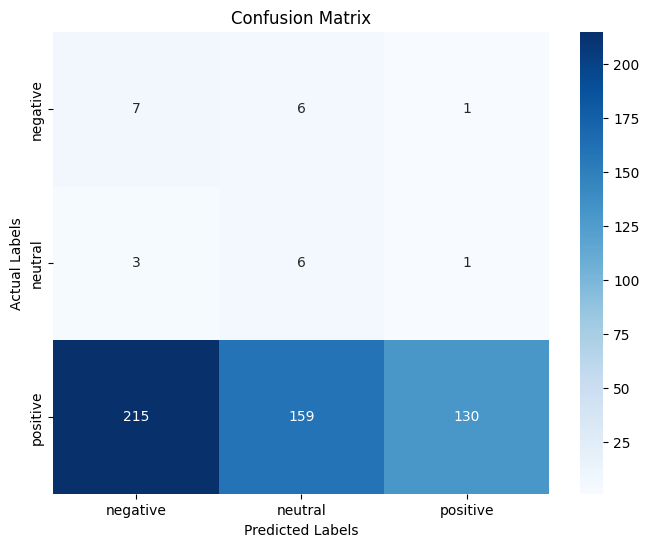

[2025-06-03 20:42:09,895][589964368.py][line:46][INFO] Test UA: 0.4526455026455027
[2025-06-03 20:42:09,896][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:09,898][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         7        6         1
neutral          3        6         1
positive       215      159       130
[2025-06-03 20:42:09,911][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:09,912][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.03      0.50      0.06        14
     neutral       0.04      0.60      0.07        10
    positive       0.98      0.26      0.41       504

    accuracy                           0.27       528
   macro avg       0.35      0.45      0.18       528
weighted avg       0.94      0.27      0.39       528

[2025-06-03 20:42:09,926][589964368.py][line:68][INFO] Positive Recall:   0.25793650793650796
[2025-06-03 20:42:09,927][5

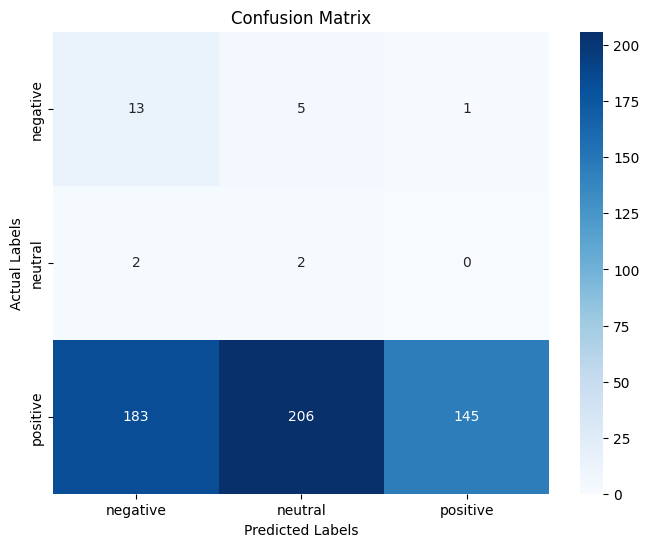

[2025-06-03 20:42:10,143][589964368.py][line:46][INFO] Test UA: 0.4852487022800447
[2025-06-03 20:42:10,144][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:10,146][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative        13        5         1
neutral          2        2         0
positive       183      206       145
[2025-06-03 20:42:10,160][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:10,161][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.07      0.68      0.12        19
     neutral       0.01      0.50      0.02         4
    positive       0.99      0.27      0.43       534

    accuracy                           0.29       557
   macro avg       0.36      0.49      0.19       557
weighted avg       0.95      0.29      0.41       557

[2025-06-03 20:42:10,188][589964368.py][line:68][INFO] Positive Recall:   0.27153558052434457
[2025-06-03 20:42:10,189][5

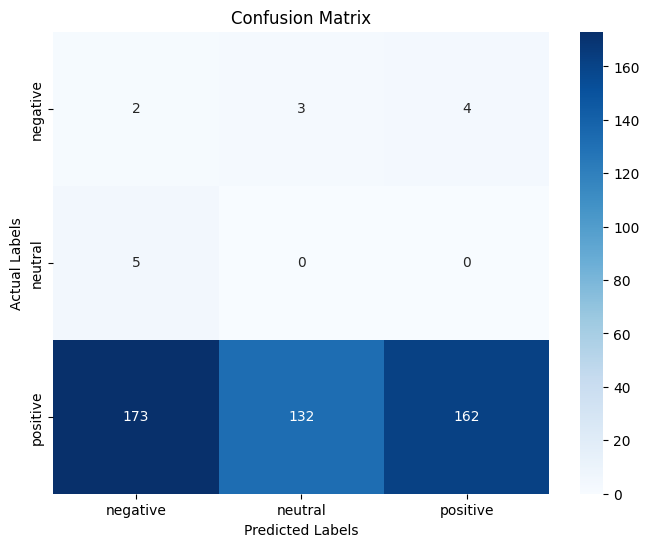

[2025-06-03 20:42:10,379][589964368.py][line:46][INFO] Test UA: 0.18970576572289635
[2025-06-03 20:42:10,380][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:10,382][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         2        3         4
neutral          5        0         0
positive       173      132       162
[2025-06-03 20:42:10,394][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:10,395][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.01      0.22      0.02         9
     neutral       0.00      0.00      0.00         5
    positive       0.98      0.35      0.51       467

    accuracy                           0.34       481
   macro avg       0.33      0.19      0.18       481
weighted avg       0.95      0.34      0.50       481

[2025-06-03 20:42:10,406][589964368.py][line:68][INFO] Positive Recall:   0.3468950749464668
[2025-06-03 20:42:10,408][5

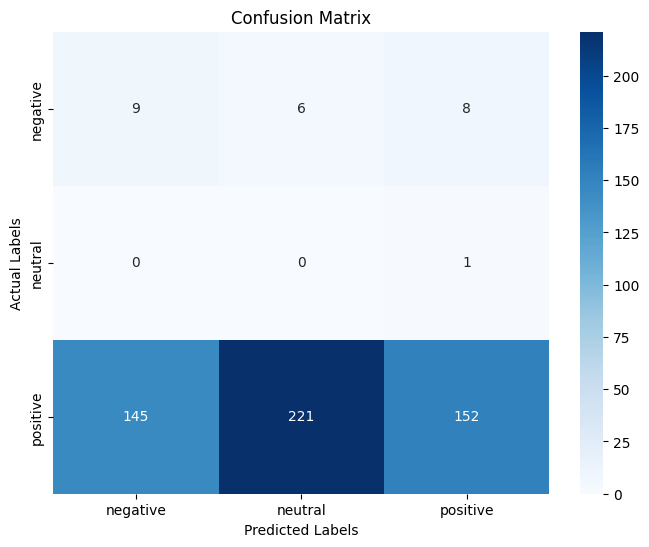

[2025-06-03 20:42:10,623][589964368.py][line:46][INFO] Test UA: 0.22824688042079347
[2025-06-03 20:42:10,624][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:10,626][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         9        6         8
neutral          0        0         1
positive       145      221       152
[2025-06-03 20:42:10,640][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:10,641][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.06      0.39      0.10        23
     neutral       0.00      0.00      0.00         1
    positive       0.94      0.29      0.45       518

    accuracy                           0.30       542
   macro avg       0.33      0.23      0.18       542
weighted avg       0.90      0.30      0.43       542

[2025-06-03 20:42:10,654][589964368.py][line:68][INFO] Positive Recall:   0.29343629343629346
[2025-06-03 20:42:10,654][

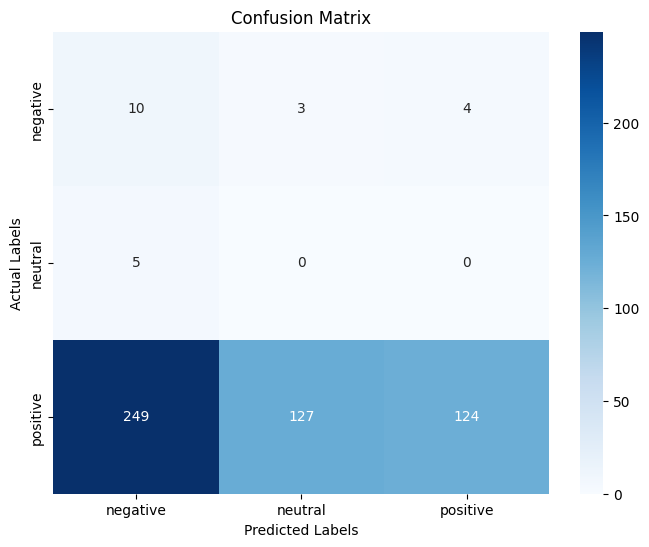

[2025-06-03 20:42:10,817][589964368.py][line:46][INFO] Test UA: 0.2787450980392157
[2025-06-03 20:42:10,818][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:10,820][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative        10        3         4
neutral          5        0         0
positive       249      127       124
[2025-06-03 20:42:10,834][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:10,835][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.04      0.59      0.07        17
     neutral       0.00      0.00      0.00         5
    positive       0.97      0.25      0.39       500

    accuracy                           0.26       522
   macro avg       0.34      0.28      0.16       522
weighted avg       0.93      0.26      0.38       522

[2025-06-03 20:42:10,848][589964368.py][line:68][INFO] Positive Recall:   0.248
[2025-06-03 20:42:10,849][589964368.py][l

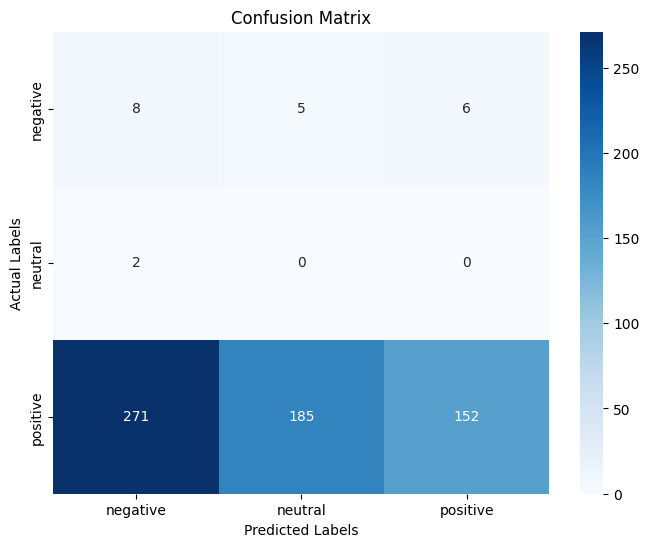

[2025-06-03 20:42:10,990][589964368.py][line:46][INFO] Test UA: 0.2236842105263158
[2025-06-03 20:42:10,990][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:10,992][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         8        5         6
neutral          2        0         0
positive       271      185       152
[2025-06-03 20:42:11,008][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:11,009][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.03      0.42      0.05        19
     neutral       0.00      0.00      0.00         2
    positive       0.96      0.25      0.40       608

    accuracy                           0.25       629
   macro avg       0.33      0.22      0.15       629
weighted avg       0.93      0.25      0.39       629

[2025-06-03 20:42:11,024][589964368.py][line:68][INFO] Positive Recall:   0.25
[2025-06-03 20:42:11,025][589964368.py][li

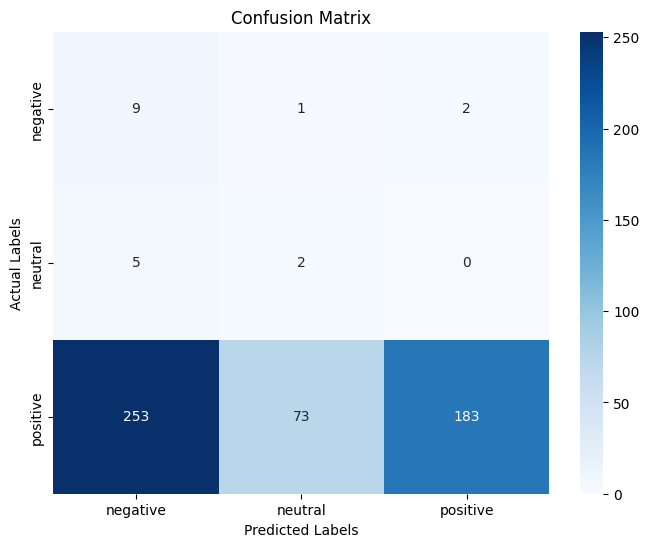

[2025-06-03 20:42:11,168][589964368.py][line:46][INFO] Test UA: 0.46508092431471604
[2025-06-03 20:42:11,169][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:11,171][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         9        1         2
neutral          5        2         0
positive       253       73       183
[2025-06-03 20:42:11,186][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:11,187][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.03      0.75      0.06        12
     neutral       0.03      0.29      0.05         7
    positive       0.99      0.36      0.53       509

    accuracy                           0.37       528
   macro avg       0.35      0.47      0.21       528
weighted avg       0.95      0.37      0.51       528

[2025-06-03 20:42:11,200][589964368.py][line:68][INFO] Positive Recall:   0.35952848722986247
[2025-06-03 20:42:11,201][

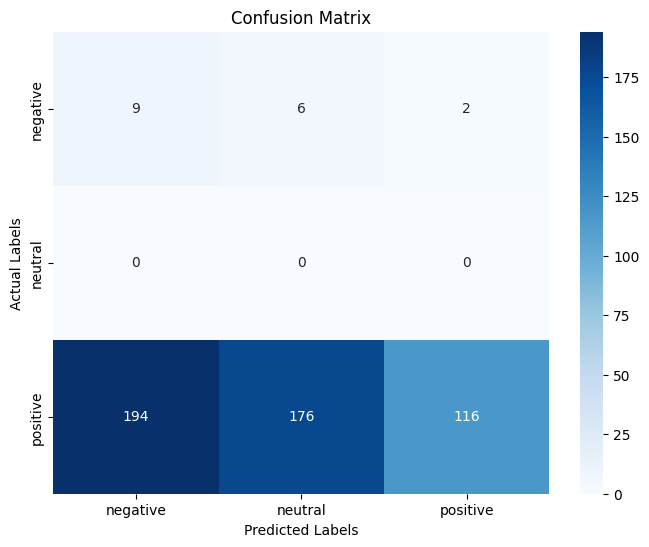

C:\Users\ChenYi\anaconda3\envs\aai3001\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[2025-06-03 20:42:11,347][589964368.py][line:46][INFO] Test UA: 0.25603163075929963
[2025-06-03 20:42:11,348][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:11,350][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         9        6         2
neutral          0        0         0
positive       194      176       116
C:\Users\ChenYi\anaconda3\envs\aai3001\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

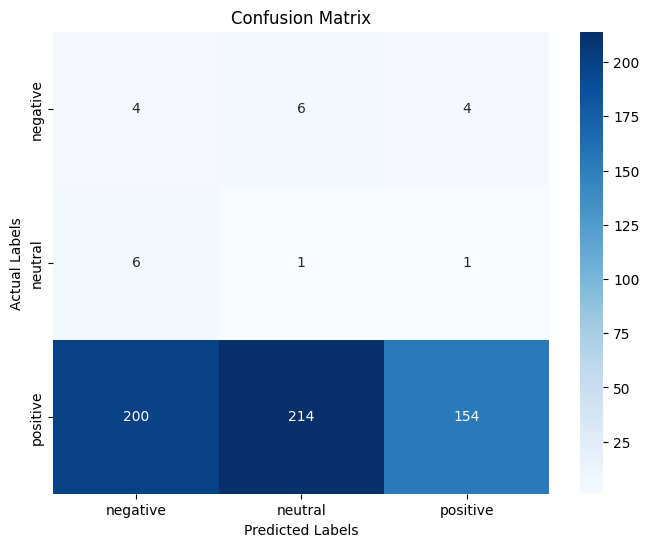

[2025-06-03 20:42:11,525][589964368.py][line:46][INFO] Test UA: 0.227280348759222
[2025-06-03 20:42:11,526][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:11,527][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         4        6         4
neutral          6        1         1
positive       200      214       154
[2025-06-03 20:42:11,543][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:11,545][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.02      0.29      0.04        14
     neutral       0.00      0.12      0.01         8
    positive       0.97      0.27      0.42       568

    accuracy                           0.27       590
   macro avg       0.33      0.23      0.16       590
weighted avg       0.93      0.27      0.41       590

[2025-06-03 20:42:11,558][589964368.py][line:68][INFO] Positive Recall:   0.2711267605633803
[2025-06-03 20:42:11,559][589

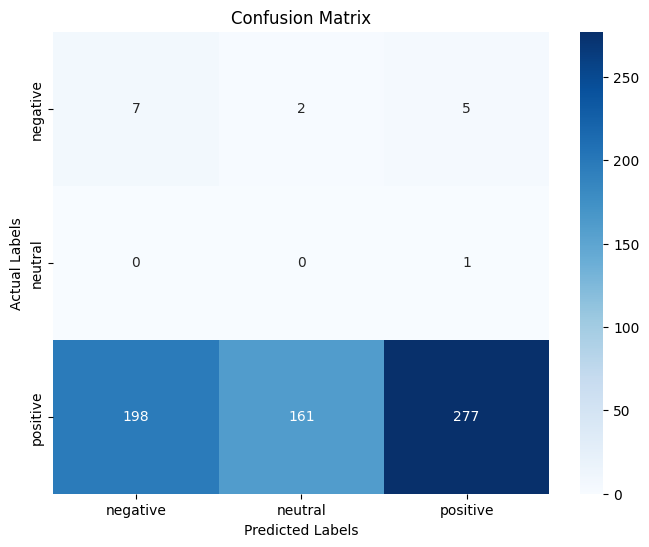

[2025-06-03 20:42:11,702][589964368.py][line:46][INFO] Test UA: 0.3118448637316562
[2025-06-03 20:42:11,703][589964368.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:42:11,704][589964368.py][line:49][INFO] 
          negative  neutral  positive
negative         7        2         5
neutral          0        0         1
positive       198      161       277
[2025-06-03 20:42:11,720][589964368.py][line:53][INFO] Classification Report:
[2025-06-03 20:42:11,722][589964368.py][line:54][INFO] 
              precision    recall  f1-score   support

    negative       0.03      0.50      0.06        14
     neutral       0.00      0.00      0.00         1
    positive       0.98      0.44      0.60       636

    accuracy                           0.44       651
   macro avg       0.34      0.31      0.22       651
weighted avg       0.96      0.44      0.59       651

[2025-06-03 20:42:11,737][589964368.py][line:68][INFO] Positive Recall:   0.43553459119496857
[2025-06-03 20:42:11,737][5

In [6]:
for i in range(10):
    df = pd.read_csv(f"fold_{i}/predictions.csv")    
    calculate_accuracy(df, i)

## Calculate Per-Class averages

In [7]:
# Compute average recall for each class over 10 folds
average_positive_recall = sum(all_positive_accuracy) / 10
average_neutral_recall = sum(all_neutral_accuracy) / 10
average_negative_recall = sum(all_negative_accuracy) / 10

# Compute average F1-score for each class over 10 folds
average_positive_f1 = sum(all_positive_f1) / 10
average_neutral_f1 = sum(all_neutral_f1) / 10
average_negative_f1 = sum(all_negative_f1) / 10

# Compute overall (macro) averages across classes
overall_average_recall = (
    average_positive_recall + average_neutral_recall + average_negative_recall
) / 3
overall_average_f1 = (
    average_positive_f1 + average_neutral_f1 + average_negative_f1
) / 3

# Log the averages
logger.info(f"")
logger.info(f"------------------------ Averages ------------------------")
logger.info(f"Average Positive Recall: {average_positive_recall:.4f}")
logger.info(f"Average Neutral Recall: {average_neutral_recall:.4f}")
logger.info(f"Average Negative Recall: {average_negative_recall:.4f}")
logger.info(f"Macro Average Recall: {overall_average_recall:.4f}")
logger.info(f"")
logger.info(f"Average Positive F1-score: {average_positive_f1:.4f}")
logger.info(f"Average Neutral F1-score: {average_neutral_f1:.4f}")
logger.info(f"Average Negative F1-score: {average_negative_f1:.4f}")
logger.info(f"Macro Average F1-score: {overall_average_f1:.4f}")


[2025-06-03 20:42:11,746][347242066.py][line:20][INFO] 
[2025-06-03 20:42:11,747][347242066.py][line:21][INFO] ------------------------ Averages ------------------------
[2025-06-03 20:42:11,747][347242066.py][line:22][INFO] Average Positive Recall: 0.2973
[2025-06-03 20:42:11,748][347242066.py][line:23][INFO] Average Neutral Recall: 0.1511
[2025-06-03 20:42:11,749][347242066.py][line:24][INFO] Average Negative Recall: 0.4872
[2025-06-03 20:42:11,750][347242066.py][line:25][INFO] Macro Average Recall: 0.3119
[2025-06-03 20:42:11,751][347242066.py][line:26][INFO] 
[2025-06-03 20:42:11,752][347242066.py][line:27][INFO] Average Positive F1-score: 0.4525
[2025-06-03 20:42:11,753][347242066.py][line:28][INFO] Average Neutral F1-score: 0.0142
[2025-06-03 20:42:11,754][347242066.py][line:29][INFO] Average Negative F1-score: 0.0672
[2025-06-03 20:42:11,755][347242066.py][line:30][INFO] Macro Average F1-score: 0.1779
